In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc
import scvelo as scv

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:105: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.19 numpy==1.16.2 scipy==1.2.1 pandas==0.24.2 scikit-learn==0.20.3 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
data = [anndata.read('./write/tgfb1-3-adata.h5ad'),
        anndata.read('./write/tgfb1-3-batch1.h5ad'),
        anndata.read('./write/tgfb1-3-batch2.h5ad')]

In [3]:
both_data, nontreated, treated = data

In [4]:
for matrix in data:
    scv.tl.velocity(matrix, mode='stochastic')
    scv.tl.velocity_graph(matrix)

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:12.27) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:07.12) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:06.43) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:15.50) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:04.78) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix
computing moments based on connectivities
    finished (0:00:03.05) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
co

In [5]:
for matrix in data:
    scv.tl.velocity_embedding(matrix, basis='umap')

computing velocity embedding
    finished (0:00:03.99) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01.35) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01.95) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


<Figure size 432x288 with 0 Axes>

In [25]:
help(scv.tl.velocity)

Help on function velocity in module scvelo.tools.velocity:

velocity(data, vkey='velocity', mode=None, fit_offset=False, fit_offset2=False, filter_genes=False, groups=None, groupby=None, groups_for_fit=None, use_raw=False, perc=[5, 95], copy=False)
    Estimates velocities in a gene-specific manner
    
    Arguments
    ---------
    data: :class:`~anndata.AnnData`
        Annotated data matrix.
    vkey: `str` (default: `'velocity'`)
        Name under which to refer to the computed velocities for `velocity_graph` and `velocity_embedding`.
    mode: `'deterministic'`, `'stochastic'` or `'bayes'` (default: `'stochastic'`)
        Whether to run the estimation using the deterministic or stochastic model of transcriptional dynamics.
        `'bayes'` solves the stochastic model and accounts for heteroscedasticity, but is slower than `'stochastic'`.
    fit_offset: `bool` (default: `False`)
        Whether to fit with offset for first order moment dynamics.
    fit_offset2: `bool`, (defa

In [ ]:
help(scv.pl.velocity_embedding_grid)

<Figure size 432x288 with 0 Axes>

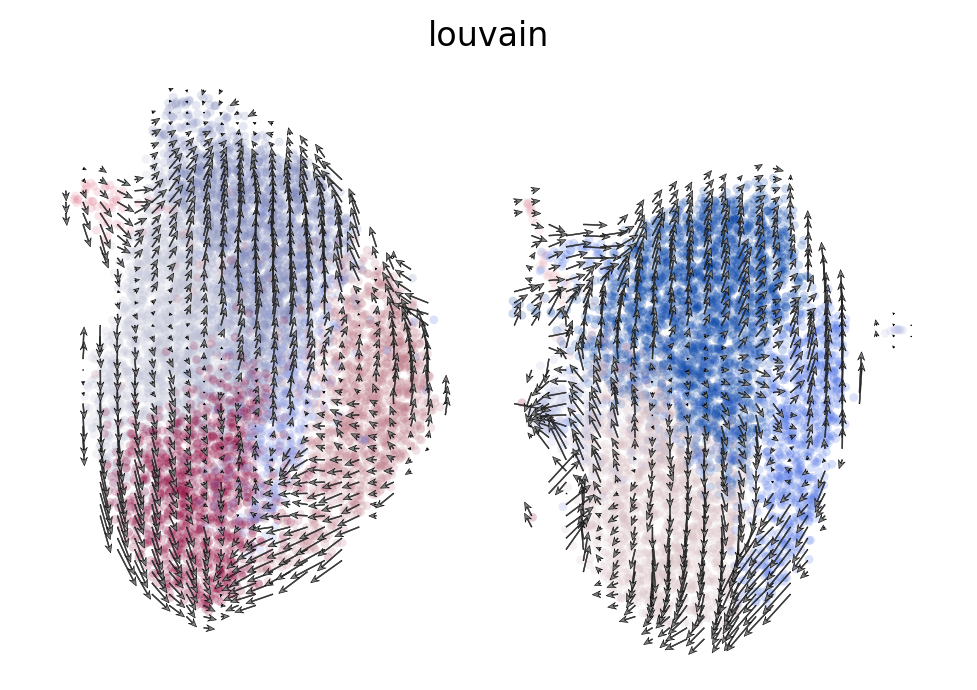

In [45]:
scv.pl.velocity_embedding_grid(both_data, basis='umap', arrow_length=4, arrow_size=1.5, dpi=200)

<Figure size 432x288 with 0 Axes>

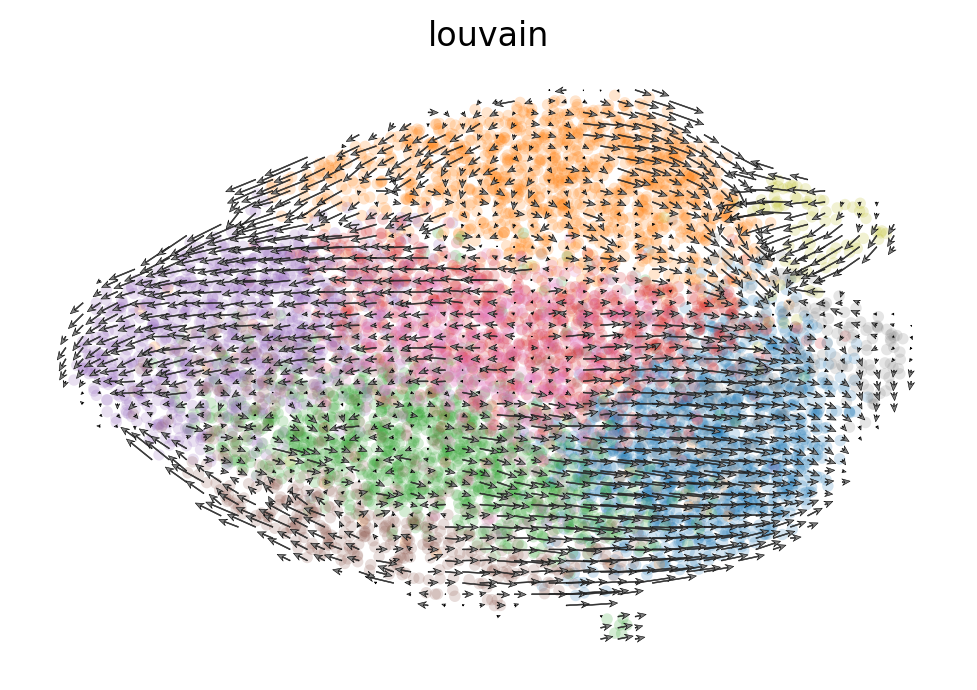

In [47]:
scv.pl.velocity_embedding_grid(treated, basis='umap', arrow_length=4, arrow_size=1.5, dpi=200)

<Figure size 432x288 with 0 Axes>

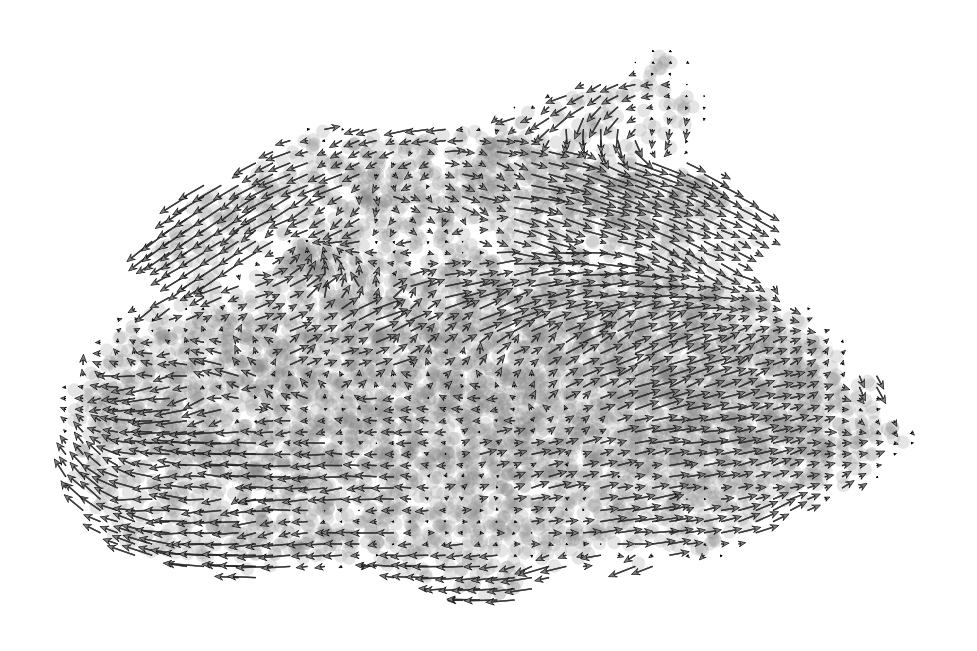

In [48]:
scv.pl.velocity_embedding_grid(nontreated, basis='umap', arrow_length=4, arrow_size=1.5, dpi=200)

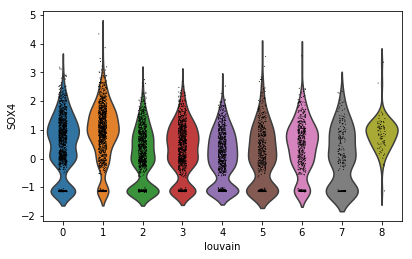

In [55]:
sc.pl.violin(treated, ["SOX4"], groupby='louvain')

In [24]:
treated.obsm["velocity_umap"]

array([[ 0.02680795, -0.00031651],
       [ 0.02546559, -0.00725317],
       [ 0.05316898, -0.0194605 ],
       ...,
       [ 0.03605287,  0.00601914],
       [ 0.04097258, -0.00069632],
       [-0.01988521, -0.01115178]])

In [42]:
treated.layers["velocity"]

array([[-0.00561023,  0.32695085,  0.05189633, ..., -0.3093729 ,
         0.01544494, -0.00626292],
       [-0.05605284, -0.01720506,  0.15292063, ...,  0.67012465,
        -0.04515289,  0.0160087 ],
       [ 0.0202952 ,  0.03933796,  0.        , ..., -0.02775395,
        -0.06282171,  0.        ],
       ...,
       [-0.03111402,  0.23902667,  0.0361326 , ...,  0.71831137,
        -0.00168181, -0.00310003],
       [-0.02550638,  0.50849956,  0.07018661, ...,  1.052529  ,
         0.0418338 , -0.00357681],
       [-0.00866935,  0.3693329 , -0.02014208, ..., -0.11047888,
        -0.01021155, -0.00495684]], dtype=float32)

In [43]:
nontreated

AnnData object with n_obs × n_vars = 5082 × 4472 
    obs: 'batch', 'cellular_barcode', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_names', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'batch_colors', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'ambiguous', 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity'

In [44]:
nontreated.write('./write/tgfb1-4-nontreated.h5ad')
treated.write('./write/tgfb1-4-treated.h5ad')